In [1]:
import pandas as pd
import numpy as np
import sqlite3
import os
import matplotlib.pyplot as plt
%matplotlib inline

# Task 0
Data extraction: get the data from 3 tables & combine it into single `.csv` file.
After that read this file using pandas to create Dataframe.
So it will be all joined data in 1 dataframe. Quick check - should be 74818 rows in it.

In [2]:
query = """
    SELECT 
        product.name as product_name,
        product.price,
        _order.datetime,
        order_item.quantity
    FROM restaurant_orderitem as order_item
    JOIN restaurant_order as _order on _order.id=order_item.order_id
    JOIN restaurant_product as product on product.id=order_item.product_id
    """

with sqlite3.connect(os.path.join("..", "db.sqlite3")) as conn:
    df = pd.read_sql_query(query, conn)
    
df.to_csv(os.path.join("..", "restaurant.csv"), index=False)

,product_name,price,datetime,quantity
0,Plain Papadum,0.80,2019-08-03 20:25:00,2
1,King Prawn Balti,12.95,2019-08-03 20:25:00,1
2,Garlic Naan,2.95,2019-08-03 20:25:00,1
3,Mushroom Rice,3.95,2019-08-03 20:25:00,1
4,Paneer Tikka Masala,8.95,2019-08-03 20:25:00,1
...,...,...,...,...
74813,House Red wine 75cl,17.95,2016-05-18 18:53:00,2
74814,House Red wine 75cl,17.95,2016-05-14 19:28:00,2
74815,House Red wine 75cl,17.95,2016-05-10 13:18:00,2
74816,House white wine 75cl,17.95,2016-04-07 19:04:00,1


# Task 1
Get Top 10 most popular products in restaurant sold by Quantity.
Count how many times each product was sold and create a pie chart with percentage of popularity (by quantity) for top 10 of them.

Example:

![pie chart](../demo/pie.png)

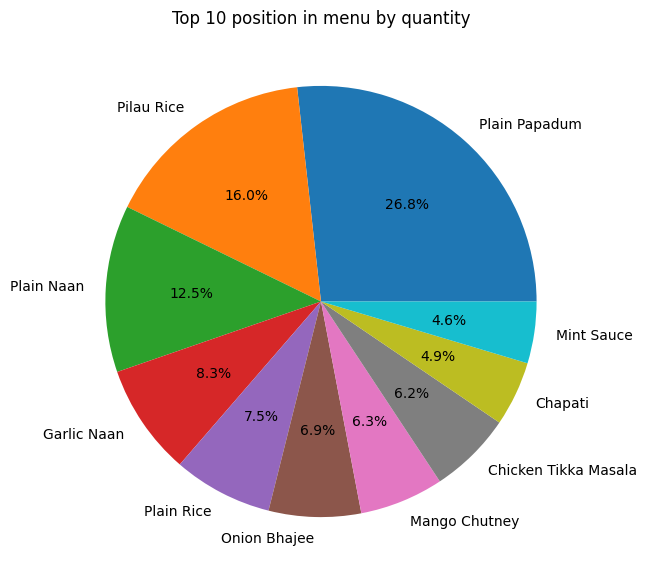

In [87]:
result = (
    df[["product_name", "quantity"]]
    .groupby("product_name")
    .agg(quantity_sum=('quantity', 'sum'), total_count=('product_name', 'count'))
    .sort_values(["quantity_sum", "total_count"], ascending=[False, False])
    .head(10)
)

plt.figure(figsize=(7, 7))
plt.pie(
    result['quantity_sum'],
    labels=result.index,
    autopct='%1.1f%%'
)
plt.title("Top 10 position in menu by quantity")
plt.show()

# Task 2
Calculate `Item Price` (Product Price * Quantity) for each Order Item in dataframe.
And Make the same Top 10 pie chart, but this time by `Item Price`. So this chart should describe not the most popular products by quantity, but which products (top 10) make the most money for restaurant. It should be also with percentage.

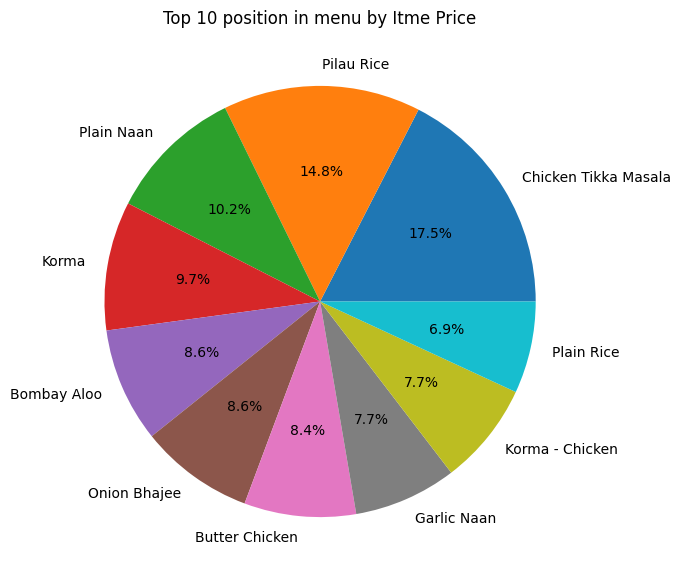

In [88]:
result = df[["product_name", "price", "quantity"]]
result["item_price"] = result["price"] * result["quantity"]
result = result[["product_name", "item_price"]].groupby("product_name").sum().sort_values("item_price", ascending=False).head(10)

plt.figure(figsize=(7, 7))
plt.pie(result["item_price"], labels=result.index, autopct="%1.1f%%")
plt.title('Top 10 position in menu by Itme Price')
plt.show()

# Task 3
Calculate `Order Hour` based on `Order Datetime`, which will tell about the specific our the order was created (from 0 to 23). Using `Order Hour` create a bar chart, which will tell the total restaurant income based on the hour order was created. So on x-axis - it will be values from 0 to 23 (hours), on y-axis - it will be the total sum of order prices, which were sold on that hour.

Example:

![bar chart](../demo/bar.png)

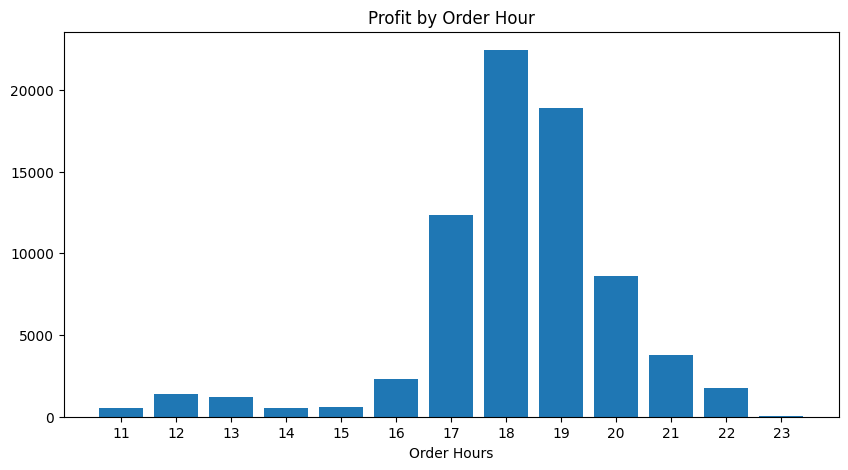

In [99]:
hours = pd.DataFrame(
    {"hour": pd.to_datetime(df['datetime']).dt.hour}
).groupby("hour").agg(orders_count=("hour", "count"))

plt.figure(figsize=(10, 5))
plt.bar(hours.index[10:23], hours["orders_count"][10:23])
plt.xlabel("Order Hours")
plt.xticks(ticks=hours.index[10:23])
plt.title("Profit by Order Hour")
plt.show()

# Task 4
Make similar bar chart, but right now with `Order Day Of The Week` (from Monday to Sunday), and also analyze total restaurant income by each day of the week.

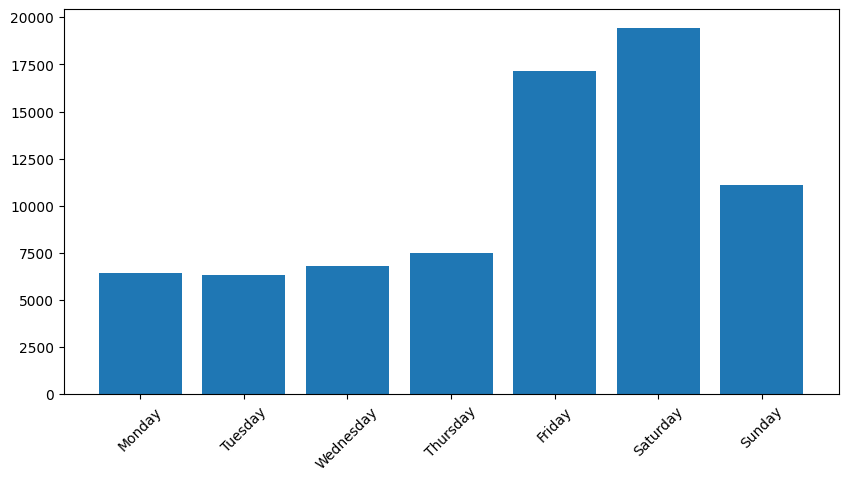

In [119]:
days = pd.DataFrame(
    {"days": pd.to_datetime(df['datetime']).dt.day_name()}
).groupby("days").agg(orders_count=("days", "count"))

day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
days.index = pd.CategoricalIndex(days.index, categories=day_order, ordered=True)
days = days.sort_index()

plt.figure(figsize=(10, 5))
plt.bar(days.index, days["orders_count"])
plt.xticks(rotation=45)
plt.show()